# 19002065
# Jaime Ariel Chitay

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy.ma as ma
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Dataset de entrenamiento y validación

In [2]:
%matplotlib inline
matplotlib.style.use('ggplot')

#Cargando datos del dataset y asignandoles variables a las columnas
dataset= np.load('proyecto_training_data.npy')
columnas = {0:"SalesPrice", 1:"OverallQual", 2:"FstFlrSF", 3:"TotRmsAbvGrd", 4:"YearBuilt", 5:"LotFrontage"}

#Determinando valores de entrenamiento y valores de validacion
c_entrenamiento=int(dataset.shape[0]*0.80)
entrenamiento_com= dataset[0:c_entrenamiento, 0:]
validacion_com= dataset[c_entrenamiento:,0:]

y = dataset[0:c_entrenamiento,0]
x = dataset[0:c_entrenamiento]

salesprice=entrenamiento_com[:, 0]
overallqual=entrenamiento_com[:, 1]
fstflrsf=entrenamiento_com[:, 2]

print(validacion_com.shape)
print(entrenamiento_com.shape)

(292, 6)
(1168, 6)


# Estadistica Descriptiba del dataset

In [3]:
for i in range(6):
    print("Media de",columnas[i], np.nanmean(entrenamiento_com[0:c_entrenamiento, i]))
    print("Maximo",columnas[i], np.nanmax(entrenamiento_com[0:c_entrenamiento, i]))
    print("Minimo",columnas[i], np.nanmin(entrenamiento_com[0:c_entrenamiento, i]))
    print("Rango",columnas[i], np.ptp(entrenamiento_com[0:c_entrenamiento, i][np.logical_not(np.isnan(entrenamiento_com[0:c_entrenamiento, i]))]))
    print("D.Estandar",columnas[i], np.nanstd(entrenamiento_com[0:c_entrenamiento, i]))
    print("**************************************************")

Media de SalesPrice 180590.27739726027
Maximo SalesPrice 755000.0
Minimo SalesPrice 34900.0
Rango SalesPrice 720100.0
D.Estandar SalesPrice 78781.95108033362
**************************************************
Media de OverallQual 6.101027397260274
Maximo OverallQual 10.0
Minimo OverallQual 1.0
Rango OverallQual 9.0
D.Estandar OverallQual 1.377435193240741
**************************************************
Media de FstFlrSF 1156.3236301369864
Maximo FstFlrSF 3228.0
Minimo FstFlrSF 334.0
Rango FstFlrSF 2894.0
D.Estandar FstFlrSF 373.620331503586
**************************************************
Media de TotRmsAbvGrd 6.4854452054794525
Maximo TotRmsAbvGrd 14.0
Minimo TotRmsAbvGrd 2.0
Rango TotRmsAbvGrd 12.0
D.Estandar TotRmsAbvGrd 1.6084517167387253
**************************************************
Media de YearBuilt 1971.451198630137
Maximo YearBuilt 2010.0
Minimo YearBuilt 1875.0
Rango YearBuilt 135.0
D.Estandar YearBuilt 29.93888206867768
*********************************************

# Graficos

C:\Users\Ariel Chitay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


SalesPrice


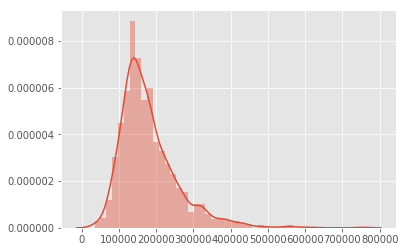

OverallQual


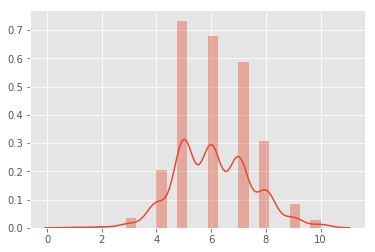

FstFlrSF


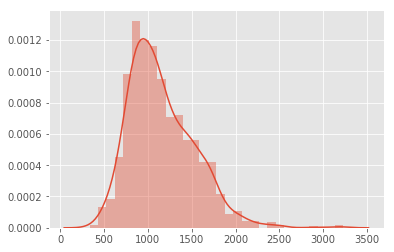

TotRmsAbvGrd


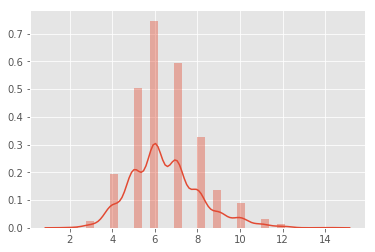

YearBuilt


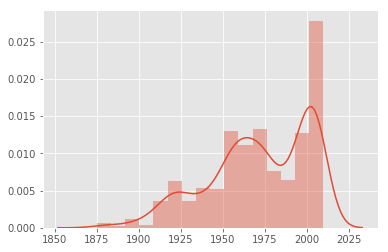

LotFrontage


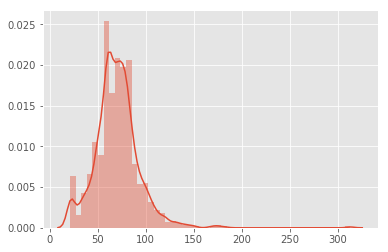

In [4]:
import seaborn as sns
for i in range(6):
    x = entrenamiento_com[:,i]
    xoutnan=x[np.logical_not(np.isnan(x))]
    vis1 = sns.distplot(xoutnan[:c_entrenamiento])
    print(columnas[i])
    plt.show()

# Coeficiente de correlacion

## Se demuestra que las primeras dos variables son las mas confiables

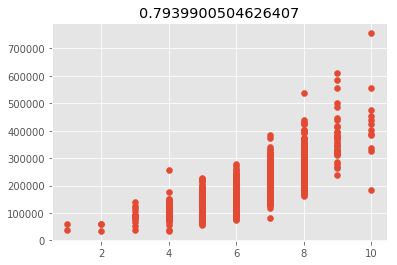

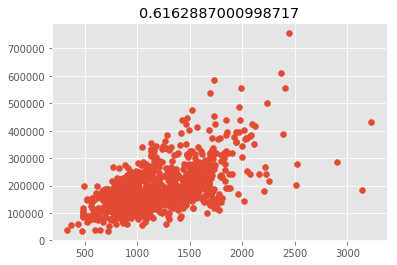

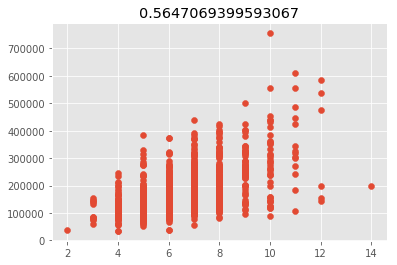

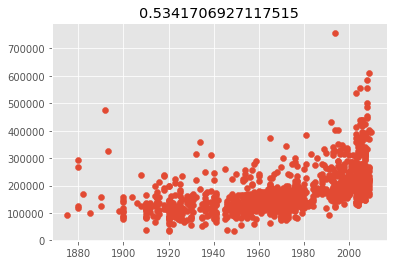

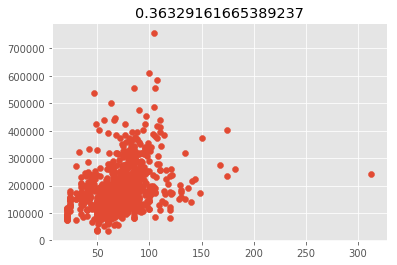

In [5]:
i=1
while i<=5: 
    x=entrenamiento_com[0:c_entrenamiento, i]
    plt.title(ma.corrcoef(ma.masked_invalid(x),ma.masked_invalid(y))[1][0])
    plt.scatter(x, y)
    plt.show()
    i+=1

# Creando un modelo predictivo

* Crear una matriz de 2 columnas
* Calcular Yhat(Predicción o estimación)
* Calcular error
* Calcular Gradientes

Según el enunciado se deben crear estos cuatro parámetros para poder 

In [6]:
def m2columnas(vec_x):
    identidad= np.ones_like(vec_x)
    func_matriz = np.array([vec_x,identidad]).T
    return func_matriz
def yhat_c(hat_x, mfbf): 
    return np.matmul(m2columnas(hat_x),mfbf)
def error_predictivo(aprox_y, y):
    return (np.nanmean((aprox_y-y)**2))/2
def gradientes_tiempo(aprox_y, y, x):
    x=m2columnas(x)
    resta=(aprox_y-y)
    resta = np.vstack((resta,resta))
    resta=resta.T      
    return np.nanmean(((resta)*x), axis=0)

def f_entrenamiento(eje_x, eje_y, epoch, imp_err_cada, learning_rate):
    vectorm_b=np.array((1,0))
    resultados = {}
    errores=[]
    i=0 
    while i <= epoch:        
        aprox_y=yhat_c(eje_x,vectorm_b)
        errores.append(error_predictivo(aprox_y,eje_y))
        gradientes= gradientes_tiempo(aprox_y, eje_y, eje_x)
        vectorm_b = vectorm_b-(learning_rate * gradientes)        
        resultados[i] = vectorm_b
        if i%imp_err_cada == 0:
            print("Error", i, errores[i])
        i+=1
    return resultados, errores

# Grafica de errores

Error 0 19408534125.107876
Error 10 9344641376.821974
Error 20 4902960813.525131
Error 30 2942560292.946249
Error 40 2077236022.806216
Error 50 1695207529.38079
Error 60 1526474578.7899008
Error 70 1451876574.2733598
Error 80 1418823754.578765
Error 90 1404106408.8491695
Error 100 1397481275.4941757


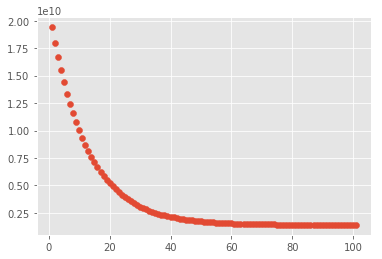

Error 0 19183499412.75856
Error 10 7062462061.295216
Error 20 3475614587.8755937
Error 30 2414197611.4008718
Error 40 2100103964.5028436
Error 50 2007157626.7884283
Error 60 1979653020.1475685
Error 70 1971513877.1052186
Error 80 1969105346.23087
Error 90 1968392613.4278147
Error 100 1968181699.8046825


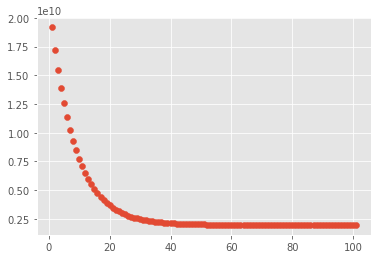

In [7]:
r1, delta1 = f_entrenamiento(overallqual, salesprice, 100,10, 0.001)
pos=np.arange(len(delta1))+1
plt.scatter(pos,delta1)
plt.show()
r2, delta2 = f_entrenamiento(entrenamiento_com[:, 2], salesprice, 100,10, 0.00000004)
pos=np.arange(len(delta2))+1
plt.scatter(pos,delta2)
plt.show()

# Mejorando modelo predictivo para OverallQuall vs Salesprice

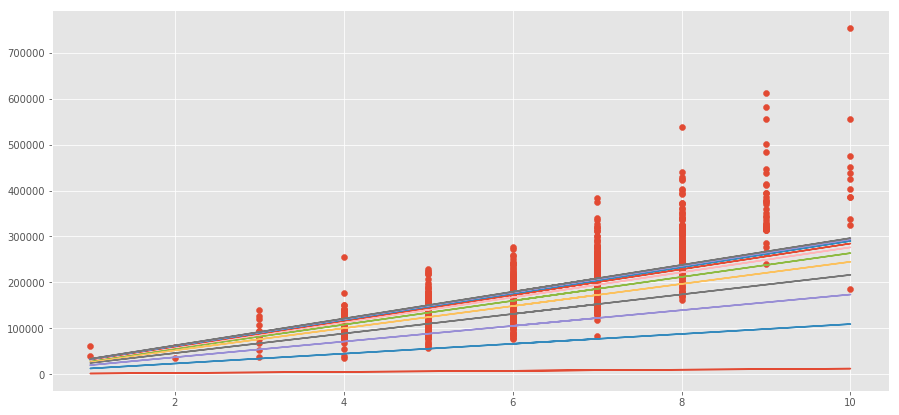

In [8]:
fig=plt.figure(figsize=(15,7))
plt.scatter(overallqual,salesprice)
for i in range(0, len(r1), 10):
        aprox_y=yhat_c(overallqual,r1.get(i))
        plt.plot(overallqual,aprox_y)

# Mejorando modelo predictivo fstflrsf vs Salesprice

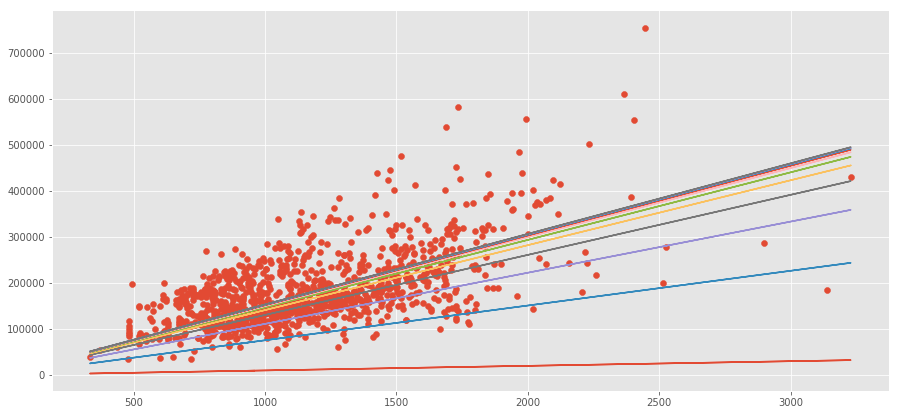

In [9]:
fig=plt.figure(figsize=(15,7))
plt.scatter(entrenamiento_com[:, 2],salesprice)

for i in range(0, len(r2), 10):
        aprox_y=yhat_c(entrenamiento_com[:, 2],r2.get(i))
        plt.plot(entrenamiento_com[:, 2],aprox_y)

In [10]:
validacion_salesprice=validacion_com[:, 0]
validacion_overallqual=validacion_com[:, 1]
validacion_fstflrsf=validacion_com[:, 2]

# Con el codigo compilado anterior, se demuestra que el modelo predictivo funciona de forma correcta.

# Predicción a través de SkLearn

In [11]:
def Regresion_ScikitLearn(entrenamiento_x, entrenamiento_y, validacion_x, validacion_y ):
    entrenamiento_x= entrenamiento_x.reshape(-1, 1)
    validacion_x = validacion_x.reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit(entrenamiento_x, entrenamiento_y)
    preciosPredecir= regr.predict(validacion_x)
    print('y = ' , regr.coef_,'x ','+','( ', regr.intercept_,')')
    plt.scatter(validacion_x, validacion_y,  color='green')
    plt.plot(validacion_x, preciosPredecir, color='red', linewidth=4)
    plt.show()
    return np.array((regr.coef_,regr.intercept_))

Modelo predictivo Overallquall:
y =  [45411.99877916] x  + (  -96469.57131873936 )


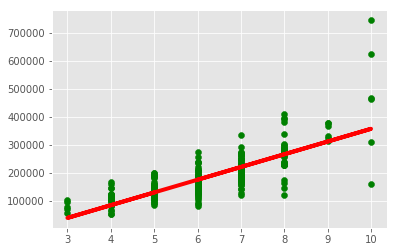

Modelo predictivo con FstFlrSF:
y =  [129.95124229] x  + (  30324.585174963693 )


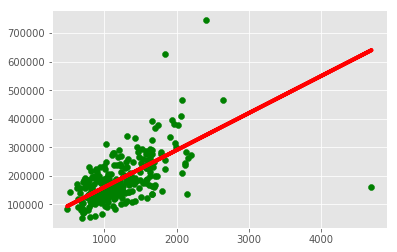

In [12]:
print('Modelo predictivo Overallquall:')
modelo1= Regresion_ScikitLearn(overallqual, salesprice, validacion_overallqual, validacion_salesprice)
print('Modelo predictivo con FstFlrSF:')
modelo2= Regresion_ScikitLearn(fstflrsf, salesprice, validacion_fstflrsf, validacion_salesprice)

In [13]:
mp=np.mean(np.array((modelo1[0][0],r1[len(r1)-1][0])))
bp=np.mean(np.array((modelo1[1],r1[len(r1)-1][1])))
vectorManual=r1[len(r1)-1]
vectorScikit=np.array([modelo1[0][0],modelo1[1]])
vectorPromedio= np.array([mp,bp])
print(vectorManual,vectorScikit,vectorPromedio)

[29225.48071606  4069.22999456] [ 45411.99877916 -96469.57131874] [ 37318.73974761 -46200.17066209]


In [14]:
mp=np.mean(np.array((modelo2[0][0],r2[len(r2)-1][0])))
bp=np.mean(np.array((modelo2[1],r2[len(r2)-1][1])))
vectorManual2=r2[len(r2)-1]
vectorScikit2=np.array([modelo2[0][0],modelo2[1]])
vectorPromedio2= np.array([mp,bp])
print(vectorManual2,vectorScikit2,vectorPromedio2)

[1.53371028e+02 1.30896497e-01] [  129.95124229 30324.58517496] [  141.66113518 15162.35803573]


# Evaluando

In [15]:
model_1,model_2,model_3 = vectorManual,vectorScikit,vectorPromedio
    
y1 = yhat_c(validacion_overallqual, model_1)
y2 = yhat_c(validacion_overallqual, model_2)
y3 = yhat_c(validacion_overallqual, model_3)
    
error_prueba_m= error_predictivo(y1, validacion_salesprice)
error_prueba_s= error_predictivo(y2, validacion_salesprice)
error_prueba_p= error_predictivo(y3, validacion_salesprice)

#error_prueba_m = err1_m1
#error_prueba_s = err2_m1
#error_prueba_p = err3_m1 

In [16]:
model_1,model_2,model_3 = vectorManual2,vectorScikit2,vectorPromedio2
    
y1 = yhat_c(validacion_fstflrsf, model_1)
y2 = yhat_c(validacion_fstflrsf, model_2)
y3 = yhat_c(validacion_fstflrsf, model_3)
    
error_prueba_m2= error_predictivo(y1, validacion_salesprice)
error_prueba_s2= error_predictivo(y2, validacion_salesprice)
error_prueba_p2= error_predictivo(y3, validacion_salesprice)

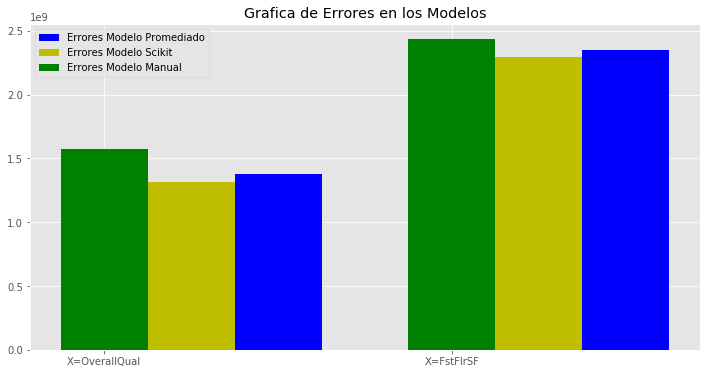

In [24]:
def GraficaErrores():
    X = np.arange(2)
    datosBarra=[[error_prueba_m, error_prueba_m2], [error_prueba_s, error_prueba_s2], [error_prueba_p, error_prueba_p2]]
 
    fig=plt.figure(figsize=(12,6))
    plt.title('Grafica de Errores en los Modelos')
    plt.bar(X + 0.50, datosBarra[2], color = "b", width = 0.25, label="Errores Modelo Promediado")
    plt.bar(X + 0.25, datosBarra[1], color = "y", width = 0.25, label="Errores Modelo Scikit")
    plt.bar(X + 0.00, datosBarra[0], color = "g", width = 0.25, label="Errores Modelo Manual")
    plt.xticks(X, ["X=OverallQual","X=FstFlrSF"])
    plt.legend()
    
GraficaErrores()